In [1]:
import pandas as pd
import numpy as np
# import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from mpl_toolkits.mplot3d import Axes3D
from dimensionality_reduction import *


0   -0.000027
1   -0.000010
dtype: float64
0   -0.000027
1   -0.000010
dtype: float64
                  0             1
count  2.513200e+04  2.513200e+04
mean  -2.719121e-05 -1.021941e-05
std    1.276673e-17  2.134565e-19
min   -2.719121e-05 -1.021941e-05
25%   -2.719121e-05 -1.021941e-05
50%   -2.719121e-05 -1.021941e-05
75%   -2.719121e-05 -1.021941e-05
max   -2.719121e-05 -1.021941e-05


In [29]:
%matplotlib inline
# %matplotlib widget
# %matplotlib notebook
# %pylab
plt.rcParams['figure.figsize'] = (16,19)
plt.style.use('ggplot')

df_rd = df_kernel_pca(caracteristicas_df, n_comp = 3, n_jobs=1)
# df_rd = df_pca(caracteristicas_df,n_comp = 3)
# df_rd = df_svd(caracteristicas_df,n_comp = 3, max_iter=100)

print(df_rd.describe())
print(df_rd.head(5))

                  0             1             2
count  2.513200e+04  2.513200e+04  2.513200e+04
mean  -2.719121e-05 -1.021941e-05 -8.315017e-06
std    1.277012e-17  1.287516e-19  2.873193e-18
min   -2.719121e-05 -1.021941e-05 -8.315017e-06
25%   -2.719121e-05 -1.021941e-05 -8.315017e-06
50%   -2.719121e-05 -1.021941e-05 -8.315017e-06
75%   -2.719121e-05 -1.021941e-05 -8.315017e-06
max   -2.719121e-05 -1.021941e-05 -8.315017e-06
          0        1         2
0 -0.000027 -0.00001 -0.000008
1 -0.000027 -0.00001 -0.000008
2 -0.000027 -0.00001 -0.000008
3 -0.000027 -0.00001 -0.000008
4 -0.000027 -0.00001 -0.000008


In [3]:
dataframe = pd.read_csv(r"caracteristicas.csv")
dataframe.head()

,Unnamed: 0,id,room_type,price,minimum_nights_x,number_of_reviews,reviews_per_month,calculated_host_listings_count,host_response_time,host_response_rate,...,minimum_maximum_nights,maximum_maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,cancellation_policy
0,0,3109,0,75,3,8,0.28,1,2,100,...,15,15,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0
1,1,5396,0,115,1,173,1.44,1,3,100,...,90,90,91.0,9.0,8.0,9.0,9.0,10.0,9.0,2
2,2,7397,0,115,10,243,2.47,1,3,100,...,23,23,94.0,10.0,9.0,10.0,10.0,10.0,10.0,1
3,5,9952,0,75,5,17,0.23,1,2,100,...,120,120,99.0,10.0,10.0,10.0,10.0,10.0,10.0,2
4,8,10710,0,90,3,40,0.36,1,3,100,...,730,730,88.0,9.0,9.0,10.0,10.0,10.0,9.0,2


In [4]:
# dataframe.describe()

In [5]:
# print(dataframe.groupby('categoria').size())

In [6]:
# dataframe.drop(['categoria'],1).hist()
# dataframe.hist()
# plt.show()

In [7]:
# sb.pairplot(dataframe.dropna(), hue='categoria',height=4,vars=["op","ex","ag"],kind='scatter')

In [30]:
# X = np.array(dataframe[["op","ex","ag"]])



# X1 = np.array(df_rd)[:,0:2]
X = np.array(df_rd)
# X = np.array(dataframe[['price','reviews_per_month','review_scores_rating']])

# print(X1.shape)
# print(X2.shape)
# X = np.concatenate((X1,X2),axis=1)

describe_x = pd.DataFrame(X)
# describe_x = describe_x.dropna()

# X = np.array(describe_x)
print(describe_x.describe())


# y = np.array(dataframe['categoria'])


X.shape

                  0             1             2
count  2.513200e+04  2.513200e+04  2.513200e+04
mean  -2.719121e-05 -1.021941e-05 -8.315017e-06
std    1.277012e-17  1.287516e-19  2.873193e-18
min   -2.719121e-05 -1.021941e-05 -8.315017e-06
25%   -2.719121e-05 -1.021941e-05 -8.315017e-06
50%   -2.719121e-05 -1.021941e-05 -8.315017e-06
75%   -2.719121e-05 -1.021941e-05 -8.315017e-06
max   -2.719121e-05 -1.021941e-05 -8.315017e-06


(25132, 3)

In [9]:
# fig = plt.figure()
# ax = Axes3D(fig)
# colores=['blue','red','green','blue','cyan','yellow','orange','black','pink','brown','purple']
# asignar=[]
# for row in y:
#     asignar.append(colores[row])
# ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)

/home/margarcuae/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:969: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  return_n_iter=True)
/home/margarcuae/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:969: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return_n_iter=True)
/home/margarcuae/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:969: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return_n_iter=True)
/home/margarcuae/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:969: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return_n_iter=True)
/home/margarcuae/anaconda3/lib/python3.7/site-packages/s

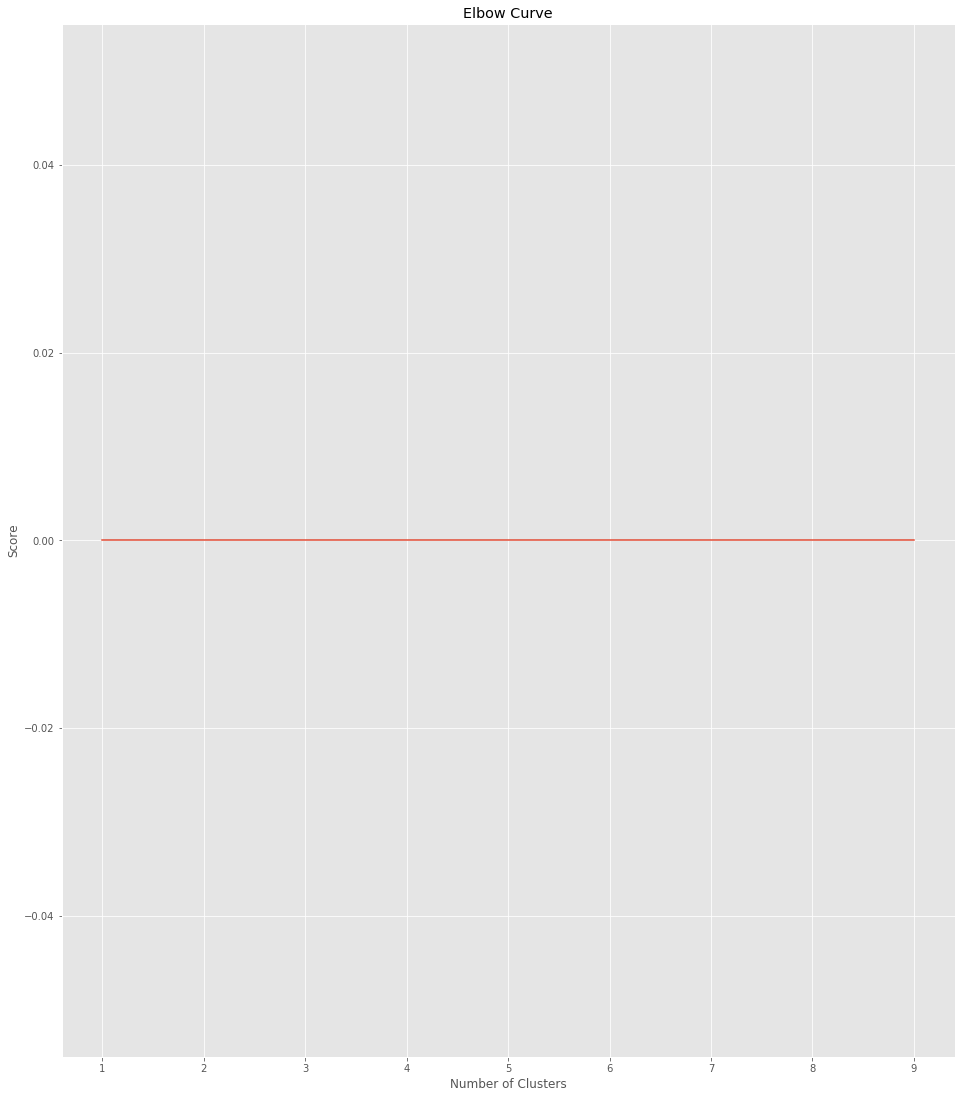

In [31]:
Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [26]:
kmeans = KMeans(n_clusters=4).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[ 1.80343844e+07 -9.96748360e+02 -2.58420807e+02]
 [ 1.80343838e+07 -9.96748086e+02 -2.57890350e+02]
 [ 1.80343836e+07 -9.96747797e+02 -2.57670225e+02]
 [ 1.80343841e+07 -9.96747759e+02 -2.58130866e+02]]


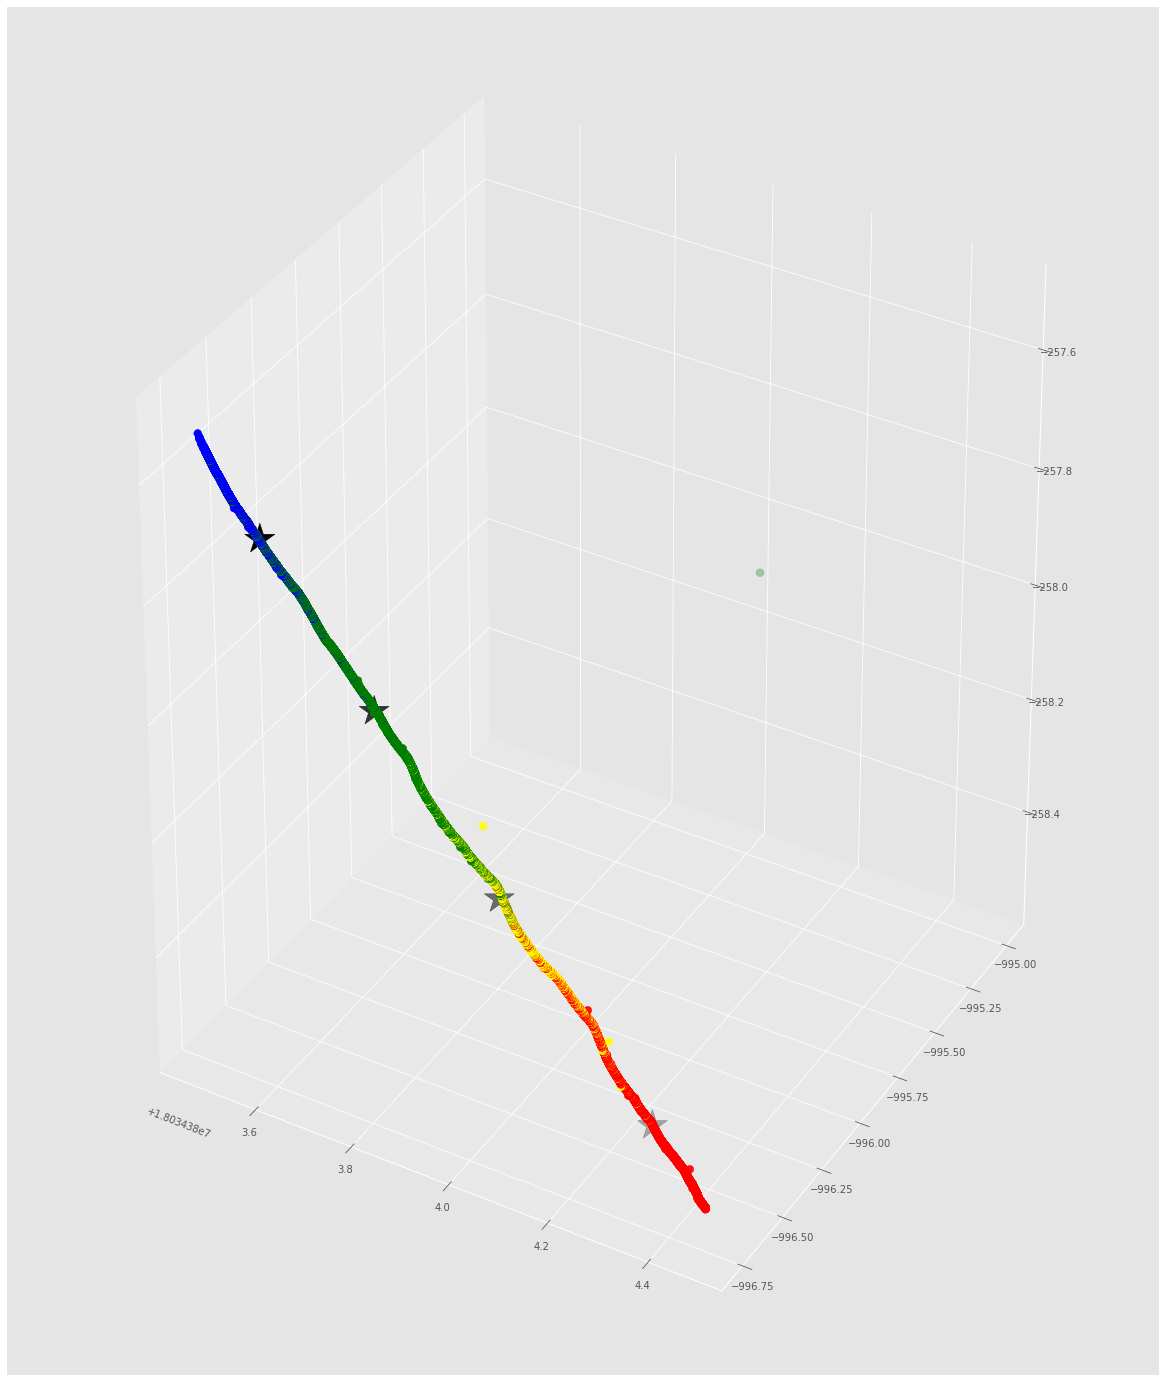

In [27]:
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
# colores=['red','green','blue','cyan','yellow']
colores=['red','green','blue','yellow']
colores2=['black','black','black','black']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)


ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
# ax.set_ylim(-996.75,-996.74)

ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores2, s=1000)